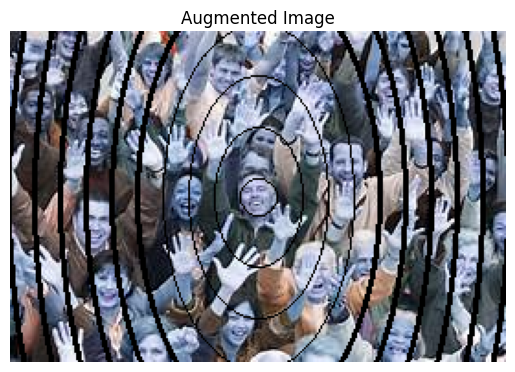

In [ ]:
import cv2
import numpy as np
import random
import torch

def apply_concentric_ellipses(image, min_radius=10, max_radius=30):
    """
    Apply concentric ellipse lines augmentation to the input image.

    Parameters:
        image (np.ndarray or torch.Tensor): The input image as a NumPy array or a PyTorch tensor.
        min_radius (int): Minimum radius of the innermost ellipse line.
        max_radius (int): Maximum radius of the outermost ellipse line.

    Returns:
        np.ndarray: The augmented image with concentric ellipse lines as a NumPy array.
    """
    # Convert the image to a NumPy array if it's a PyTorch tensor
    if isinstance(image, torch.Tensor):
        image = image.cpu().numpy()

    # Create a copy of the image to apply the augmentation without modifying the original image
    augmented_image = np.copy(image)

    # Get the image width and height
    height, width, _ = augmented_image.shape

    # Calculate the center of the concentric ellipse lines
    center_x = width // 2
    center_y = height // 2

    # Calculate the diagonal length of the image
    spacing = random.choice(range(10, 20))
    diagonal_length = int(np.sqrt(width**2 + height**2))

    # Calculate the number of concentric ellipses based on the diagonal length and spacing
    num_ellipses = (diagonal_length - min_radius) // spacing

    for i in range(num_ellipses + 1):
        # Calculate the current radii for the ellipse
        current_radius_x = min_radius + i * spacing
        current_radius_y = min_radius + i * spacing * 2  # Make the ellipses more elongated (you can adjust the factor)

        # Draw the concentric ellipse on the image
        color = (0, 0, 0)  # Black color
        thickness = random.choice(range(1, 3))
        cv2.ellipse(augmented_image, (center_x, center_y), (current_radius_x, current_radius_y), 0, 0, 360, color, thickness)

    # Convert the image back to the original format (tensor) if it was provided as a tensor
    if isinstance(image, torch.Tensor):
        augmented_image = torch.from_numpy(augmented_image)

    return augmented_image


import cv2
import matplotlib.pyplot as plt

# Load the input image using OpenCV
image_path = '/content/ex.jpeg'
image = cv2.imread(image_path)

# Apply concentric circle lines augmentation
image = apply_concentric_ellipses(image, min_radius=10, max_radius=30)

# Display the augmented image using matplotlib
plt.imshow(image)
plt.title('Augmented Image')
plt.axis('off')
plt.show()
